In [17]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',
                   start=start_date,
                   end=end_date,
                   progress=False)



In [18]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-13,133.360001,134.110001,132.770004,133.639999,133.312607,16409900
2023-11-14,135.649994,137.240005,135.100006,135.429993,135.098221,22317300
2023-11-15,136.639999,136.839996,135.330002,136.380005,136.045898,15840900
2023-11-16,136.960007,138.880005,136.080002,138.699997,138.360214,17615100
2023-11-17,137.820007,138.000000,135.479996,136.940002,136.604523,25565300


In [20]:
data['Date'] = data.index
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2024-11-05,170.830002,172.097000,170.369995,171.410004,171.410004,12518300
247,2024-11-06,175.350006,178.639999,175.039993,178.330002,178.330002,27061500
248,2024-11-07,179.110001,182.580002,178.889999,182.279999,182.279999,16730400
249,2024-11-08,182.000000,182.350006,179.570007,179.860001,179.860001,15021500
250,2024-11-11,180.070007,182.085007,179.990005,181.970001,181.970001,12492500


In [21]:
# Shape of datasets

data.shape

(251, 7)

**We need the date and close prices columns for the rest of the task**

In [22]:
# taking Date and Close columns

data = data[['Date', 'Close']]
data.head()

,Date,Close
0,2023-11-13,133.639999
1,2023-11-14,135.429993
2,2023-11-15,136.380005
3,2023-11-16,138.699997
4,2023-11-17,136.940002


**Visualize the close prices of Google**

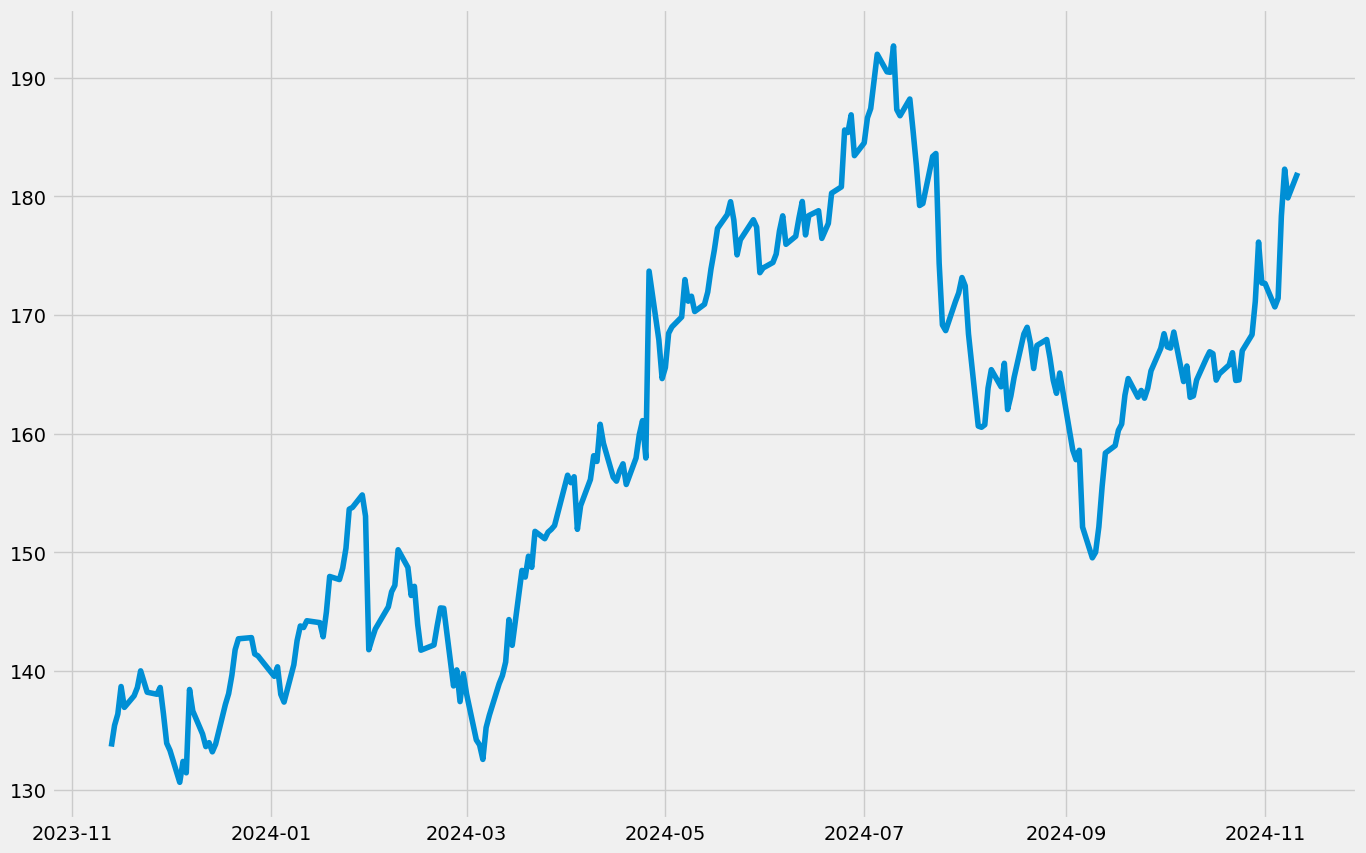

In [25]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data['Date'], data['Close'])

**Using ARIMA for Time Series Forecasting**

- Before using ARIMA model, we have to figure out whether our data is stationary or seasonal.
- To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the Time Series data into trend, seasonal, and residuals for better understanding of the Time Series data.

<Figure size 640x480 with 0 Axes>

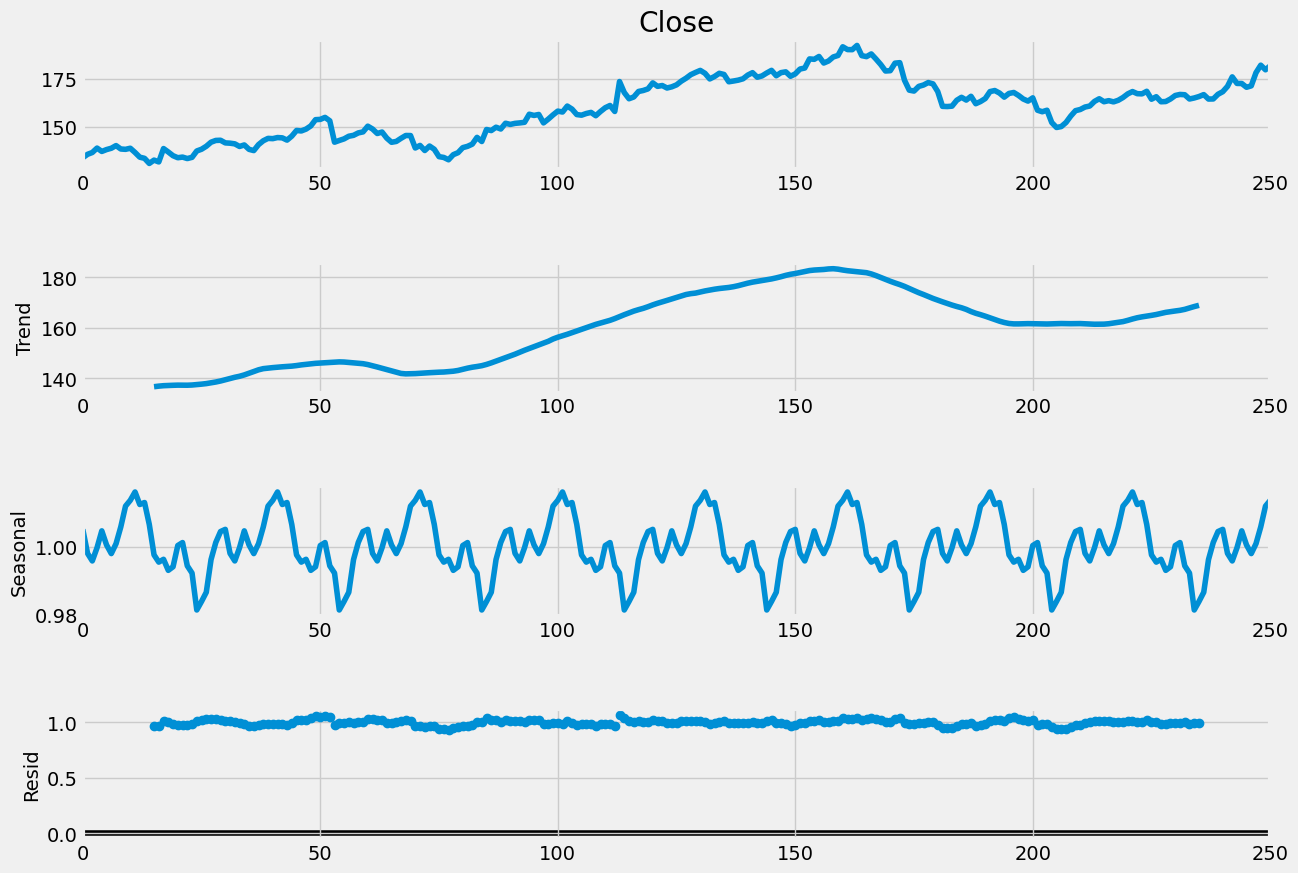

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'],
                            model = 'multiplicative', period=30)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

- Our data is not stationary, it is **seasonal**.
- We need to use **Seasonal ARIMA (SARIMA)** model for Time Series Forecasting.
- Before this, we use ARIMA model to learn using both models. 

- To use ARIMA or SARIMA models, we need to find the **p**, **d**, and **q** values.
- For **p** value, plot the autocorrelation of the **Close** column.
- For **q** value, plit the partial autocorrelation plot.
- Value of **d** is **0** or **1** (**for stationary d=0 and for seasonal d=1**)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

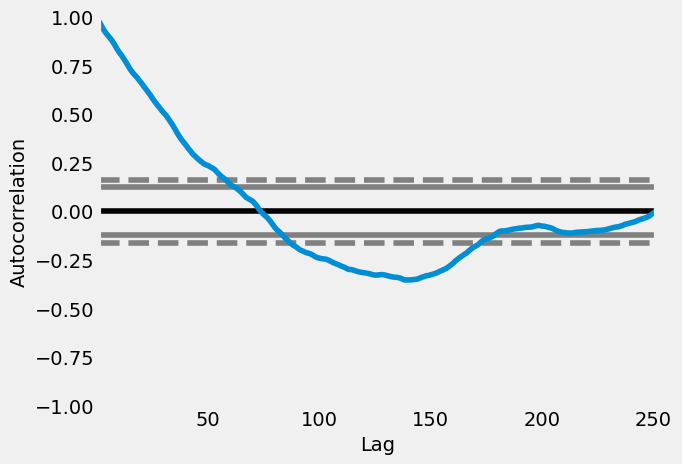

In [31]:
# for p value
pd.plotting.autocorrelation_plot(data['Close'])

C:\Users\Rahul Raj\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


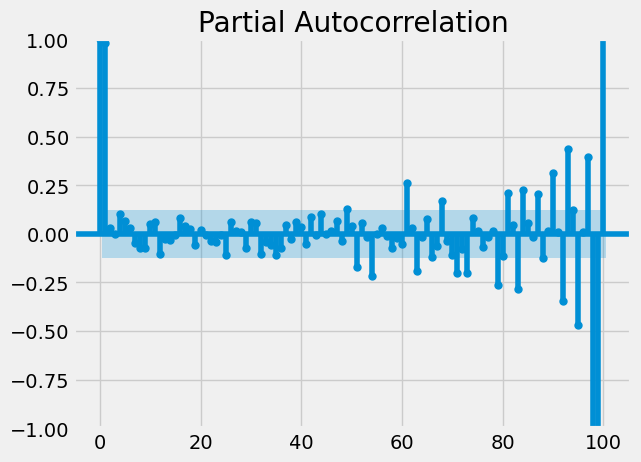

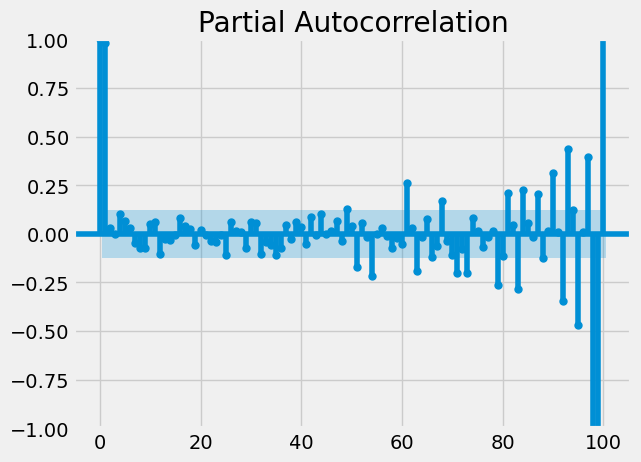

In [32]:
# for q value

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Close'], lags=100)

In [33]:
p, d, q = 5, 1, 2

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Close'], order=(p,d,q))

# fit the model
fitted = model.fit()

# set the display option
fitted.params['disp'] = -1
print(fitted.summary())

C:\Users\Rahul Raj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rahul Raj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -592.222
Date:                Tue, 12 Nov 2024   AIC                           1200.443
Time:                        23:11:01   BIC                           1228.615
Sample:                             0   HQIC                          1211.781
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5915      0.060      9.835      0.000       0.474       0.709
ar.L2         -0.9651      0.073    -13.219      0.000      -1.108      -0.822
ar.L3         -0.0651      0.103     -0.630      0.5

C:\Users\Rahul Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Predict the values using the ARIMA model**

In [34]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      133.639992
2      135.415759
3      136.326274
4      138.525142
          ...    
246    170.866569
247    171.955046
248    178.707926
249    182.014352
250    179.142022
Name: predicted_mean, Length: 251, dtype: float64


- **You can see that the predicted values are wrong as data is seasonal.**

In [37]:
# so we use SARIMA model

import statsmodels.api as sm
import warnings

model = sm.tsa.statespace.SARIMAX(data['Close'],
                                  order = (p,d,q),
                                  seasonal_order = (p,d,q,12))
model = model.fit()
print(model.summary())

C:\Users\Rahul Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -576.122
Date:                            Tue, 12 Nov 2024   AIC                           1182.245
Time:                                    23:17:25   BIC                           1234.329
Sample:                                         0   HQIC                          1203.236
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6294      0.103      6.089      0.000       0.427       0.832
ar.L2         -0.8917      0.109   

**Lets predict the future stock price using SARIMA model for next 10 days.**

In [46]:
pred = model.predict(len(data), len(data)+10)
print(pred)

251    180.013418
252    179.424816
253    180.270693
254    181.642928
255    181.783934
256    181.050209
257    180.264498
258    180.586349
259    181.992020
260    181.688546
261    182.221824
Name: predicted_mean, dtype: float64


<Axes: >

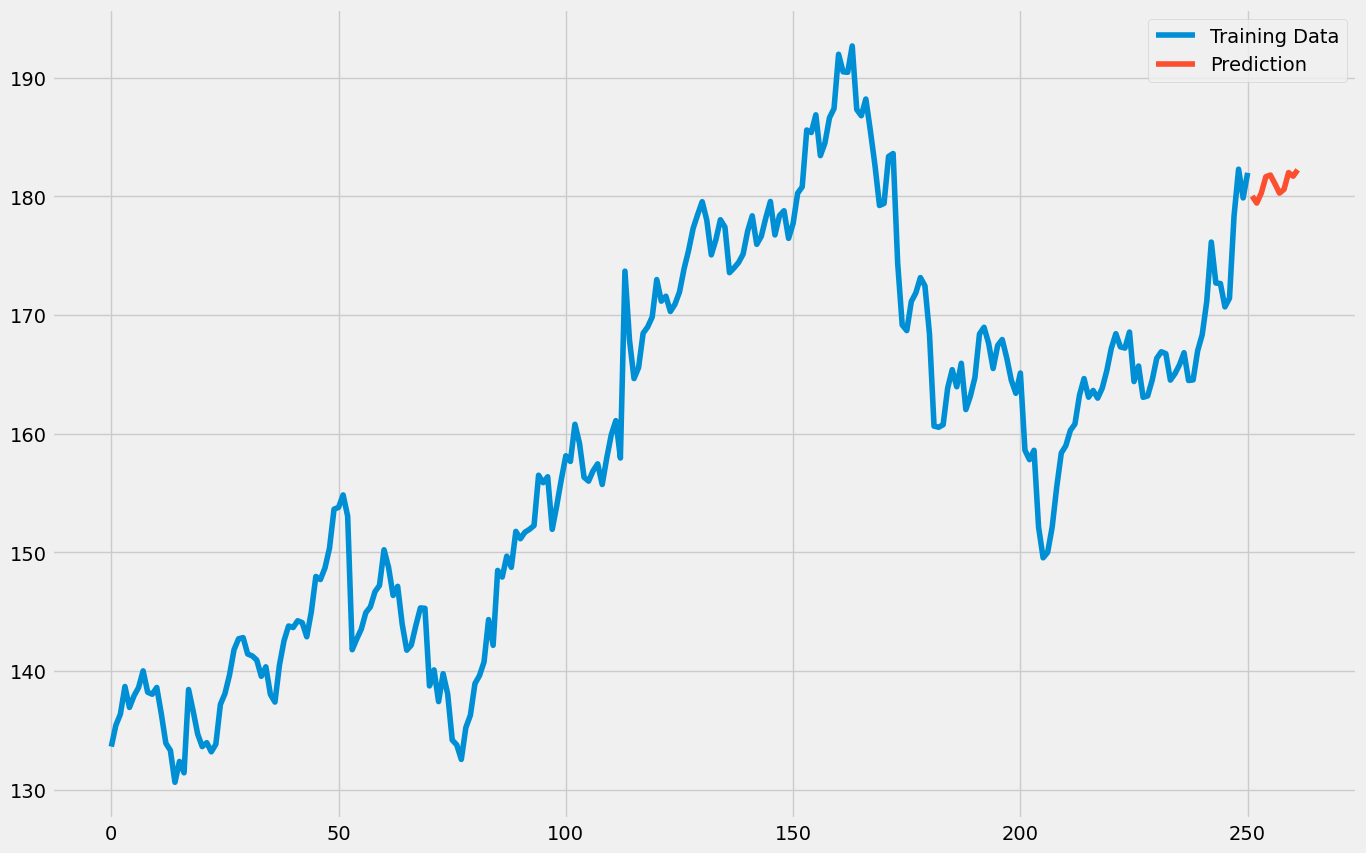

In [47]:
# plot the predictions

data['Close'].plot(legend=True, label='Training Data', figsize=(15,10))
pred.plot(legend=True, label='Prediction')